In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
%matplotlib inline

# Выбранное распределение

Выбираю гамма-распределение c параметром $k = 4, \theta = 1$  и генерирую выборку из объема 1000:

In [2]:
k, theta = 4., 1.
gamma_rv = sts.gamma(k)
rvs = gamma_rv.rvs(1000)

Строю гистограмму выборки и теоретическую плотность распределения случайной величины

Text(0.5, 0, '$x$')

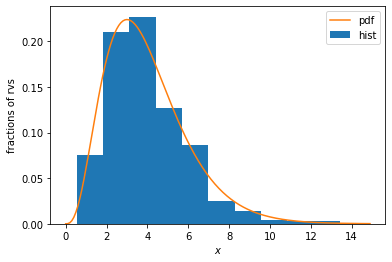

In [3]:
plt.hist(rvs, density=True, label='hist')
x = np.arange(0., 15., 0.1)
plt.plot(x, gamma_rv.pdf(x), label='pdf')

plt.legend()
plt.ylabel('fractions of rvs')
plt.xlabel('$x$')

# Оценка распределений выборочного среднего

Определим функцию, которая будет возвращать массив объемом 1000 средних значений для выборок размером $n$, строить гистограмму и соответствующее нормальное распределение.

Формулы, которые я использую: $\mathbb{E}[X] = k\theta \\ \mathbb{D}[X] = k\theta^2 \\ \sigma = \sqrt{\mathbb{D}[X]} = \theta\sqrt{k}$

In [5]:
def deal_with(n, lbound, rbound):
    # Нахождение средних из 1000 выборок размером n
    means = np.array([])
    for i in range(1000):
        rvs = gamma_rv.rvs(n)
        means = np.append(means, np.mean(rvs))  # Добавляем среднее значение выборки в массив средних
    
    # Построение гистограммы из полученных выборок
    plt.hist(means, density=True, label='hist')
    
    # Построение нормального распределения с теоретическими параметрами из гамма-распределения 
    m = k * theta  # Математическое ожидание
    sigma = np.sqrt(k) * theta / np.sqrt(n)  # Среднеквадратическое отклонение
    x = np.arange(lbound, rbound, 0.01)
    norm_y = sts.norm.pdf(x, loc=m, scale=sigma)
    plt.plot(x, norm_y, label='theor. pdf')
    
    plt.legend()
    plt.ylabel('fractions of values')
    plt.xlabel('$x$')

## Для $n = 3$

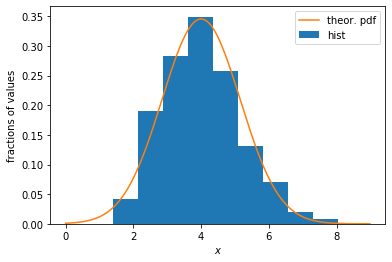

In [6]:
deal_with(3, 0., 9.)

## Для $n = 10$

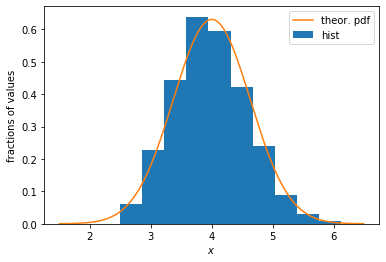

In [7]:
deal_with(10, 1.5, 6.5)

## Для $n = 30$

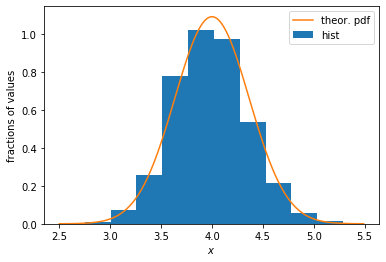

In [8]:
deal_with(30, 2.5, 5.5)

# Вывод

При $n = 3$ на гистограмме все еще присутствует сдвиг в левую сторону, правая часть гистограммы длинее левой.

При $n = 10$ гистограмма немного выравнивается и становится похожей на нормальное распределение.

При $n = 30$ становится симметричнее.

**Точность аппроксимации:** С увеличением выборки $n$ гистограмма приближается к нормальному распределению, т.е. увеличивается симметричность, пропадает сдвиг и наличиие "хвоста" в одну из сторон на гистограмме. 